# Cron
Un **cron** es un servicio del sistema que se utiliza para programar y automatizar la ejecución de tareas en momentos específicos o en intervalos regulares. Estas tareas programadas se conocen como ***trabajos cron*** o ***cron jobs***.

**¿Cómo funciona cron?**
El servicio cron lee los archivos llamados **crontab** que contienen una lista de tareas y la programación para cada una. Cada usuario en el sistema puede tener su propio crontab.

## Formato del crontab

```* * * * * comando```

Los 5 primeros campos (asteriscos) representan el momento en el que se ejecutará el comando:

* 1. Minutos de 0 - 59
* 2. Hora de 0 a 23
* 3. Día del mes de 1 a 31
* 4. Mes del 1 al 12
* 5. Día de la semana del 0 al 6 donde 0 es domingo
 
Después de estos campos se especifica el **comando** o **script** que se ejecutará, por ejemplo, para ejecutar un script todos los días a las 2:30 AM:

```30 2 * * * ./script.sh```

### Editar un crontab
```crontab -e```

In [2]:
crontab -h

usage:	crontab [-u user] [-n] file
	crontab [ -u user ] [ -i ] { -e | -l | -r }

	-h	(displays this help message)

	file	(default operation is replace, per 1003.2)
	-n	(dry run: checks the syntax, then bails out)
	-u user	(choose the user whose crontab is touched)

	-e	(edit user's crontab)
	-l	(list user's crontab)
	-r	(delete user's crontab)

	-i	(prompt before deleting user's crontab)


: 1

## Crear un cron
Si ejecutamos ```cron -e``` por primera vez, nos dirá que no existe pero que se creará uno nuevo:

In [ ]:
crontab -e

no crontab for vagrant - using an empty one

Select an editor.  To change later, run 'select-editor'.
  1. /bin/nano        <---- easiest
  2. /usr/bin/vim.tiny



Lo creamos desde la terminal.

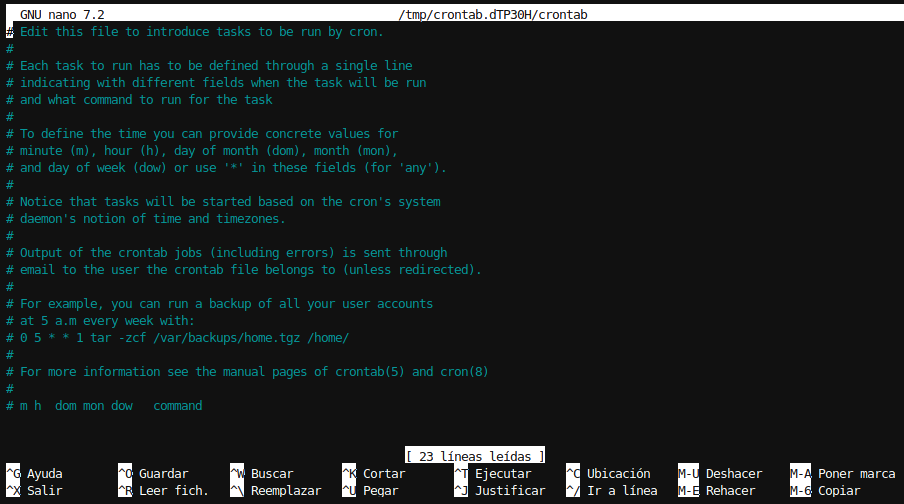

Salimos del crontab y creamos un archivo llamado saludo.sh desde la terminal:
```nano saludo.sh```

El contenido será:
```sh
#!/bin/bash

FECHA=$(date)
# Usamos {} como buena practica para indicar que nos referimos a una variable y no como parte del script
echo "Saludos desde crontab "${FECHA}
```

In [2]:
bash saludo.sh

Saludos desde crontab lun 25 nov 2024 17:01:01 CST


Editamos el crontab con ```crontab -e``` y agregamos lo siguiente para ejecutar el script cada minuto:

```* * * * * bash /home/vagrant/jupyter/DevOps/7-Cron/saludo.sh```

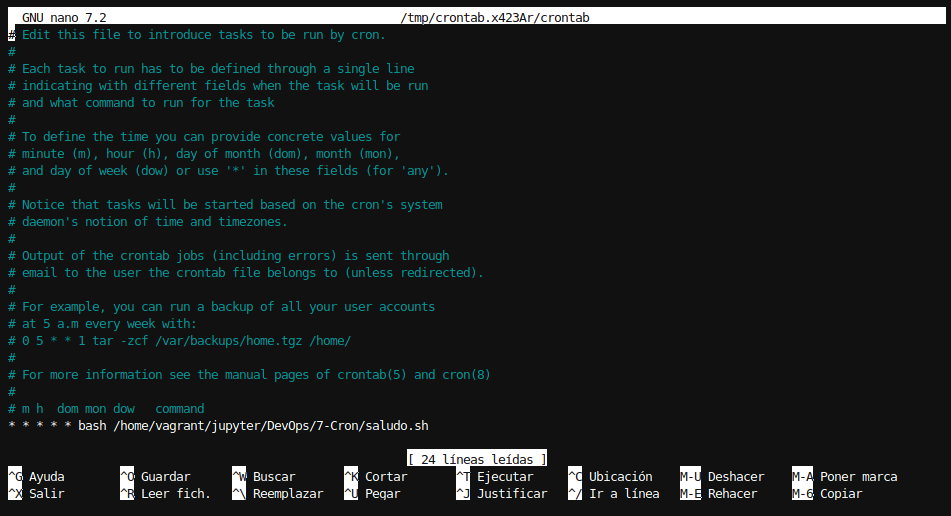

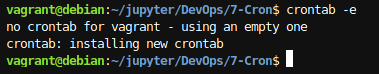

Revisamos el contenido del crontab:

In [4]:
crontab -l

# Edit this file to introduce tasks to be run by cron.
# 
# Each task to run has to be defined through a single line
# indicating with different fields when the task will be run
# and what command to run for the task
# 
# To define the time you can provide concrete values for
# minute (m), hour (h), day of month (dom), month (mon),
# and day of week (dow) or use '*' in these fields (for 'any').
# 
# Notice that tasks will be started based on the cron's system
# daemon's notion of time and timezones.
# 
# Output of the crontab jobs (including errors) is sent through
# email to the user the crontab file belongs to (unless redirected).
# 
# For example, you can run a backup of all your user accounts
# at 5 a.m every week with:
# 0 5 * * 1 tar -zcf /var/backups/home.tgz /home/
# 
# For more information see the manual pages of crontab(5) and cron(8)
# 
# m h  dom mon dow   command
* * * * * bash $HOME/jupyter/DevOps/7-Cron/saludo.sh


Instalamos sendmail desde la terminal para recibir el resultado de la ejecución: ```sudo apt sendmail``` y nos vamos a la ruta donde se envían los resultados:

In [5]:
cd /var/mail

In [6]:
pwd

/var/mail


In [7]:
ls

vagrant


Revisamos el contenido:

In [8]:
cat vagrant

From vagrant@debian.vagrant  Mon Nov 25 17:20:01 2024
Return-Path: <vagrant@debian.vagrant>
Received: from debian.vagrant (localhost [127.0.0.1])
	by debian.vagrant (8.17.1.9/8.17.1.9/Debian-2+deb12u2) with ESMTP id 4APNK1jk006028
	for <vagrant@debian.vagrant>; Mon, 25 Nov 2024 17:20:01 -0600
Received: (from vagrant@localhost)
	by debian.vagrant (8.17.1.9/8.17.1.9/Submit) id 4APNK1nZ006012
	for vagrant; Mon, 25 Nov 2024 17:20:01 -0600
Date: Mon, 25 Nov 2024 17:20:01 -0600
Message-Id: <202411252320.4APNK1nZ006012@debian.vagrant>
From: root@debian.vagrant (Cron Daemon)
To: vagrant@debian.vagrant
Subject: Cron <vagrant@debian> bash /home/vagrant/jupyter/DevOps/7-Cron/saludo.sh
MIME-Version: 1.0
Content-Type: text/plain; charset=UTF-8
Content-Transfer-Encoding: 8bit
X-Cron-Env: <SHELL=/bin/sh>
X-Cron-Env: <HOME=/home/vagrant>
X-Cron-Env: <PATH=/usr/bin:/bin>
X-Cron-Env: <LOGNAME=vagrant>

Saludos desde crontab lun 25 nov 2024 17:20:01 CST

From vagrant@debian.vagrant  Mon Nov 25 17:21:01 2

Podemos ver que se ejecutó ya 3 veces.

Redirigimos la salida:

```* * * * * bash /home/vagrant/jupyter/DevOps/7-Cron/saludo.sh >> /home/vagrant/jupyter/DevOps/7-Cron/cronlog```

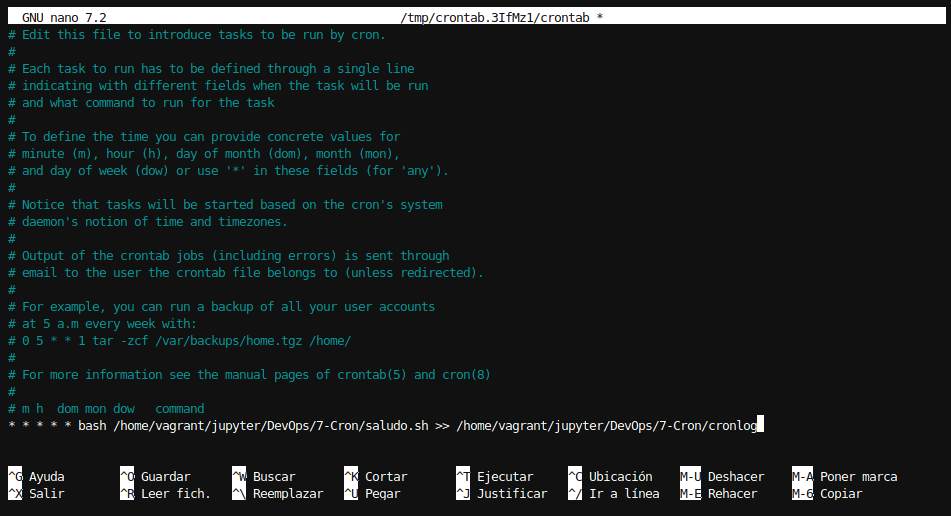

In [12]:
cd $HOME/jupyter/DevOps/7-Cron

In [13]:
cat cronlog

Saludos desde crontab lun 25 nov 2024 17:29:01 CST
Saludos desde crontab lun 25 nov 2024 17:30:01 CST
Saludos desde crontab lun 25 nov 2024 17:31:01 CST
